# WeatherPy
----
### Analysis
* As noted in the first chart where latitude is plotted against temperature, higher maximum temperatures are indeed found in cities closer to the equator.
* There seems to be a tendency toward higher humididy for cities far from the equator, as seen in the city_lat_vs_humidity chart.
* The Cloudiness chart shows there is no obvious difference in cloud cover based on latitude.

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#api_key

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Making sure the api is working on 1 manual city before doing 500+ calls!!

# #api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1111111111
# #api.openweathermap.org/data/2.5/weather?q={city name}
# from pprint import pprint
# #print(api_key)
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "Imperial"
# city = "new york"
# query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
# query_url
# response = requests.get(query_url).json()
# pprint(response)


In [4]:
# Set config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#set variables
count = 0
cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# to test with - change cities2 to cities in loop below once successful
#cities2 = ["new york", "paris", "london", "moscow", "sydney"]
# Loop through the list of cities and perform a request for data on each
print(f"Beginning data retrieval\n------------------------")
for city in cities:  #<--cities2 was here to test
    #not all cities will be avail from openweather, so do exception handling
    try:
        count += 1
        response = requests.get(query_url + city).json()
        print(f"Processing Record {count} | {city}")
        cities_found.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        # Pause so we don't lock out the openweathermap API with too many request too quickly
        time.sleep(1)
    except:
        print(f"City not found. Skipping...")
print(f"------------------------\nData Retrieval Complete\n------------------------")
#print(f'Cities: {cities2}\nCloudiness: {cloudiness}\nMax temps: {max_temp}')  #<--used w/ cities2 to test

Beginning data retrieval
------------------------
Processing Record 1 | new norfolk
Processing Record 2 | chapais
Processing Record 3 | dudinka
Processing Record 4 | sault sainte marie
Processing Record 5 | arraial do cabo
Processing Record 6 | ushuaia
Processing Record 7 | kariapatti
Processing Record 8 | yaan
Processing Record 9 | bluff
Processing Record 10 | najran
Processing Record 11 | labytnangi
Processing Record 12 | cherskiy
Processing Record 13 | torbay
Processing Record 14 | mumford
Processing Record 15 | cayenne
Processing Record 16 | georgetown
Processing Record 17 | punta arenas
Processing Record 18 | barcelona
Processing Record 19 | cape town
Processing Record 20 | epe
Processing Record 21 | lazaro cardenas
Processing Record 22 | busselton
Processing Record 23 | ponta do sol
Processing Record 24 | saskylakh
Processing Record 25 | petatlan
Processing Record 26 | codrington
Processing Record 27 | atuona
Processing Record 28 | bairiki
City not found. Skipping...
Processing R

Processing Record 231 | novovorontsovka
Processing Record 232 | souillac
Processing Record 233 | caborca
Processing Record 234 | naze
Processing Record 235 | san patricio
Processing Record 236 | thompson
Processing Record 237 | luzhou
Processing Record 238 | flinders
Processing Record 239 | pitimbu
Processing Record 240 | inuvik
Processing Record 241 | sayyan
Processing Record 242 | ouadda
Processing Record 243 | jalu
Processing Record 244 | ancud
Processing Record 245 | kirakira
Processing Record 246 | nanzhang
Processing Record 247 | platteville
Processing Record 248 | port elizabeth
Processing Record 249 | andrews
Processing Record 250 | ayorou
Processing Record 251 | basco
Processing Record 252 | east london
Processing Record 253 | makat
Processing Record 254 | minyar
Processing Record 255 | nsukka
Processing Record 256 | shchigry
Processing Record 257 | bredasdorp
Processing Record 258 | makakilo city
Processing Record 259 | lasa
Processing Record 260 | puri
Processing Record 261 

Processing Record 455 | booue
Processing Record 456 | bengkulu
City not found. Skipping...
Processing Record 457 | anadyr
Processing Record 458 | yakeshi
Processing Record 459 | yushu
Processing Record 460 | gunnedah
Processing Record 461 | pengcheng
Processing Record 462 | nome
Processing Record 463 | mnogovershinnyy
Processing Record 464 | maykop
Processing Record 465 | pailon
Processing Record 466 | lamar
Processing Record 467 | xaxim
Processing Record 468 | brae
Processing Record 469 | sechura
Processing Record 470 | amazar
Processing Record 471 | nicoya
Processing Record 472 | luancheng
Processing Record 473 | polunochnoye
Processing Record 474 | alice springs
Processing Record 475 | qiongshan
Processing Record 476 | mgachi
Processing Record 477 | murray bridge
Processing Record 478 | arlit
Processing Record 479 | ixtapa
Processing Record 480 | hastings
Processing Record 481 | barguzin
Processing Record 482 | palabuhanratu
City not found. Skipping...
Processing Record 483 | roebou

In [5]:
# create a data frame from cities, cloudiness, countries, date, humidity, lat, lng, max temp, and wind speed
#     Changed cities in dictionary from cities2 when done testing
weather_dict = {
    "City": cities_found,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# weather_data.to_csv("weather_data.csv",index=False, header=True)
weather_data.to_csv(output_data_file, index=False, header=True)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Norfolk,20,AU,1566504361,69,-42.78,147.06,39.2,6.93
1,Chapais,90,CA,1566504362,72,49.78,-74.86,60.8,10.29
2,Dudinka,40,RU,1566504364,93,69.41,86.18,53.6,2.24
3,Sault Sainte Marie,40,CA,1566504365,45,46.49,-84.36,68.0,10.29
4,Arraial do Cabo,75,BR,1566504366,64,-22.97,-42.02,69.8,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

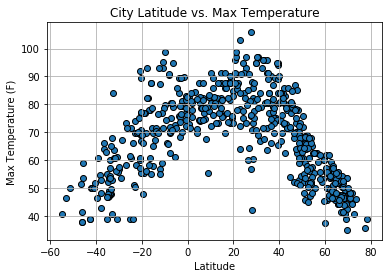

In [11]:
# Build a scatter plot for Latitude vs. Temperature
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], edgecolors="black")

# Add other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/city_lat_vs_temp.png")


#### Latitude vs. Humidity Plot

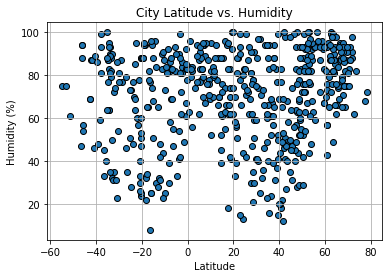

In [13]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data['Lat'], weather_data['Humidity'], edgecolors="black")

# Add other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/city_lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

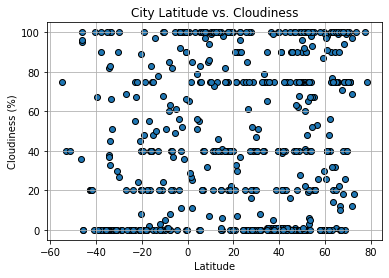

In [14]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], edgecolors="black")

# Add other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/city_lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

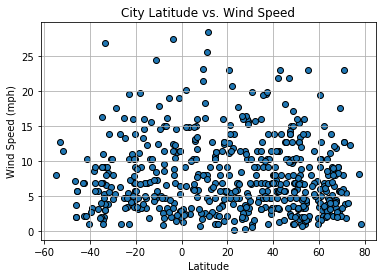

In [15]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], edgecolors="black")

# Add other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/city_lat_vs_windspeed.png")